In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b43d737233661e7285ed9f70809cef3ab471ec948df9068ae2d47e1df09d7df0
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
!pip install graphframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00


In [3]:
!curl -L -o "/usr/local/lib/python3.10/dist-packages/pyspark/jars/graphframes-0.8.0-spark3.0-s_2.12.jar" http://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k  100  242k    0     0  1044k      0 --:--:-- --:--:-- --:--:-- 1039k


In [4]:
from google.colab import drive
drive.mount('/content/drive')
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataGradovi = spark.read.csv('/content/drive/MyDrive/Collab/gradoviSaDrzavama.csv',header = True)
dataGraneGG = spark.read.csv('/content/drive/MyDrive/Collab/grane.csv',header = True)
dataDrzave = spark.read.csv('/content/drive/MyDrive/Collab/drzave.csv',header = True)
dataGraneDG = spark.read.csv('/content/drive/MyDrive/Collab/gradDrzavGrane.csv',header = True)

In [6]:
from graphframes  import GraphFrame
gGG = GraphFrame(dataGradovi, dataGraneGG)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:169: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [7]:
import pyspark.sql.functions as F
gGG.degrees.select(F.mean("degree")).show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-----------------+
|      avg(degree)|
+-----------------+
|6.605569263306309|
+-----------------+



In [8]:
gGG.edges.show()

+-------+------+
|    src|   dst|
+-------+------+
|1425428|  1792|
|1425428|  8673|
|1425428| 40898|
|1425428| 23556|
|1425428| 43684|
|1425428|503361|
|1425428| 26793|
|1425428| 72778|
|1425428|   749|
|1425428|  2765|
|1425428|  1715|
|1425428| 41621|
|1425428| 42200|
|1425428| 14169|
|1425428|130840|
|1425428|  5468|
|1425428| 33405|
|1425428| 57278|
|   8194|259272|
| 483331|388224|
+-------+------+
only showing top 20 rows



In [9]:
gGG.vertices.show()

+----+---------+----------------+--------------------+
|  id|countryId|            name|             country|
+----+---------+----------------+--------------------+
|1963|     1049|        Khartoum|               Sudan|
|  85|       79|           Cairo|               Egypt|
| 406|       43|        Istanbul|              Turkey|
|2044|       38|        Florence|               Italy|
| 612|      878|           Dubai|United Arab Emirates|
| 656|      159|Saint Petersburg|              Russia|
|2028|       38|          Verona|               Italy|
| 900|      159|           Kazan|              Russia|
|1960|      924|   Dar es Salaam|            Tanzania|
|1055|      183|         Hamburg|             Germany|
|1903|       38|         Catania|               Italy|
|1289|      142|        Grenoble|              France|
|1345|       30|    Philadelphia|United States of ...|
|1891|       38|         Bologna|               Italy|
|1435|      224|          Zagreb|             Croatia|
|1524|    

In [10]:
datatemp = dataGradovi.select('id','countryId').withColumnRenamed('countryId', 'countryId2').withColumnRenamed('id', 'id2')
dataGraneDD  = dataGraneGG.join(dataGradovi.select('id','countryId'), dataGraneGG["src"] == dataGradovi["id"]).join(datatemp, dataGraneGG["dst"] == datatemp["id2"]).select('countryId', 'countryId2')
dataGraneDD = dataGraneDD.withColumnRenamed('countryId', 'src').withColumnRenamed('countryId2' , 'dst')
gDD = GraphFrame(dataDrzave, dataGraneDD)

In [11]:
gDD.vertices.count()

192

In [12]:
gDD.edges.show()

+---+----+
|src| dst|
+---+----+
|145|  36|
|145|1033|
|145| 142|
|145|  30|
|145| 148|
|145|  34|
|145|  20|
|145| 148|
|145|  55|
|145| 183|
|145| 183|
|145| 801|
|145| 148|
|145| 252|
|145| 258|
|145| 258|
|145|  30|
|145| 408|
| 36|  37|
| 43| 227|
+---+----+
only showing top 20 rows



In [13]:
gDD.degrees.select(F.max("degree")).show()

+-----------+
|max(degree)|
+-----------+
|       2480|
+-----------+



In [14]:
dataDrzave.show()

+---+--------------------+
| id|             country|
+---+--------------------+
| 16|              Canada|
| 17|               Japan|
| 20|              Norway|
| 27| Republic of Ireland|
| 28|             Hungary|
| 29|               Spain|
| 30|United States of ...|
| 31|             Belgium|
| 32|          Luxembourg|
| 33|             Finland|
| 34|              Sweden|
| 35|             Denmark|
| 36|              Poland|
| 37|           Lithuania|
| 38|               Italy|
| 39|         Switzerland|
| 40|             Austria|
| 41|              Greece|
| 43|              Turkey|
| 45|            Portugal|
+---+--------------------+
only showing top 20 rows



In [15]:
max_degree = gDD.outDegrees.select(F.max(F.col('outDegree')).alias('outDegree')).collect()[0]['outDegree']
maxDgr = gDD.outDegrees.filter(F.col("outDegree") == max_degree)
maxDgr.join(dataDrzave, maxDgr["id"]==dataDrzave["id"]).show()

+---+---------+---+-------+
| id|outDegree| id|country|
+---+---------+---+-------+
| 36|     1240| 36| Poland|
+---+---------+---+-------+



In [16]:
brBG = gDD.edges.groupBy(["src","dst"]).count()
max_count = brBG.select(F.max(F.col('count')).alias('count')).collect()[0]['count']
maxConn = brBG.filter(F.col('count') == max_count)
maxConn.join(dataDrzave, maxConn["src"]==dataDrzave["id"]).show()

+---+---+-----+---+-------+
|src|dst|count| id|country|
+---+---+-----+---+-------+
|183| 36|  293|183|Germany|
| 36|183|  293| 36| Poland|
+---+---+-----+---+-------+



In [17]:
poljska = gDD.edges
poljska = poljska.where("src == '36'")
srbija = gDD.edges
srbija = srbija.where("src == '403'")

In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import math

<ipython-input-19-5e3eb22f6526>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values.groupby(['country']).sum().plot(kind='pie', y='count')


<Axes: ylabel='count'>

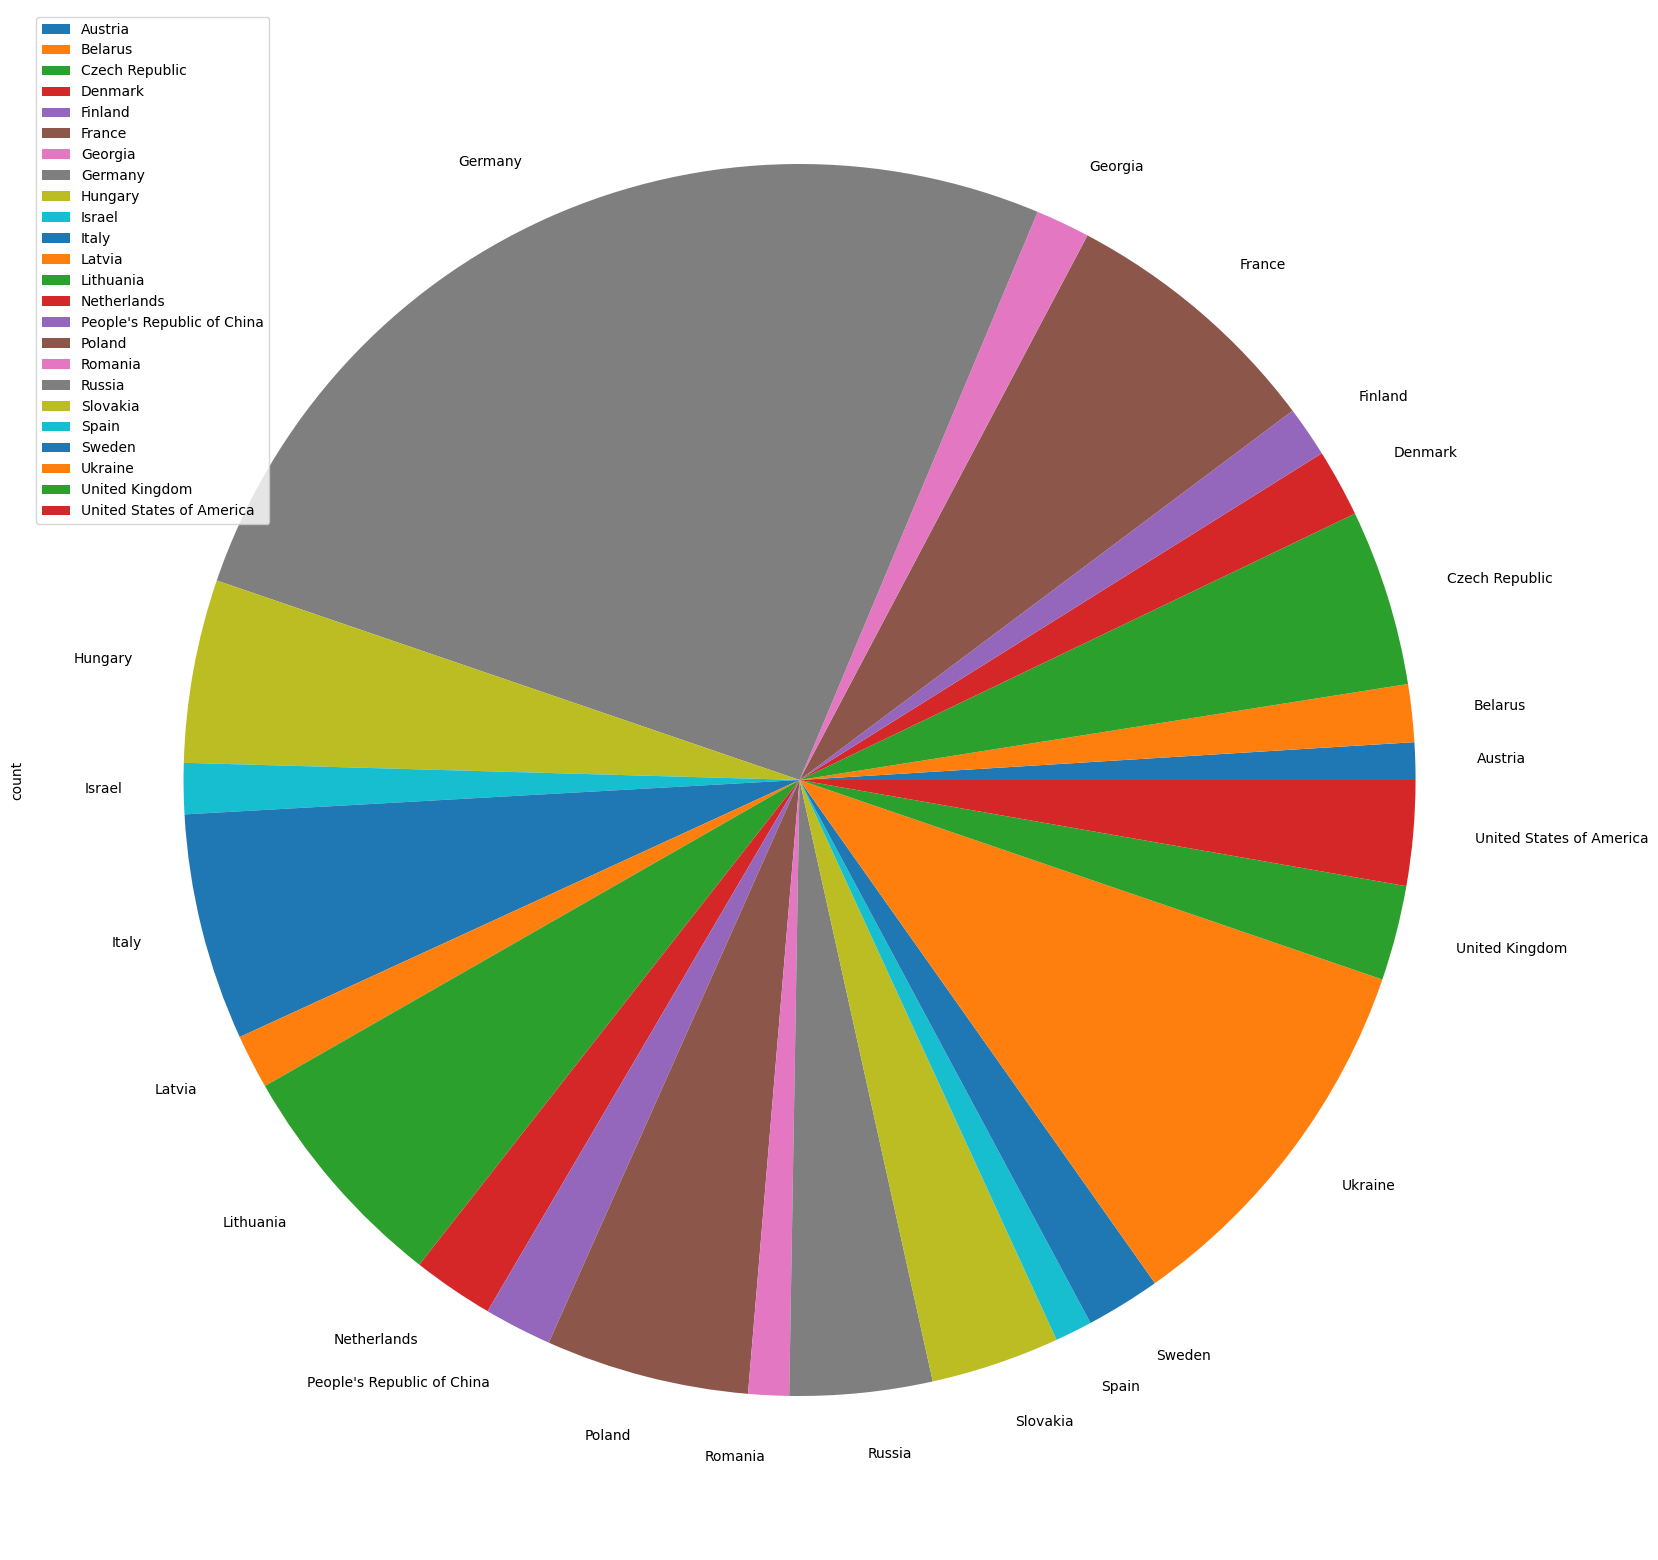

In [19]:
values = poljska.groupBy(["src","dst"]).count().where("count > '10'")
values = values.join(dataDrzave, maxConn["dst"]==dataDrzave["id"]).toPandas()
plt.rcParams["figure.figsize"] = (20,20)
values.groupby(['country']).sum().plot(kind='pie', y='count')

<ipython-input-20-8ef7a6e2d5e4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values.groupby(['country']).sum().plot(kind='pie', y='count')


<Axes: ylabel='count'>

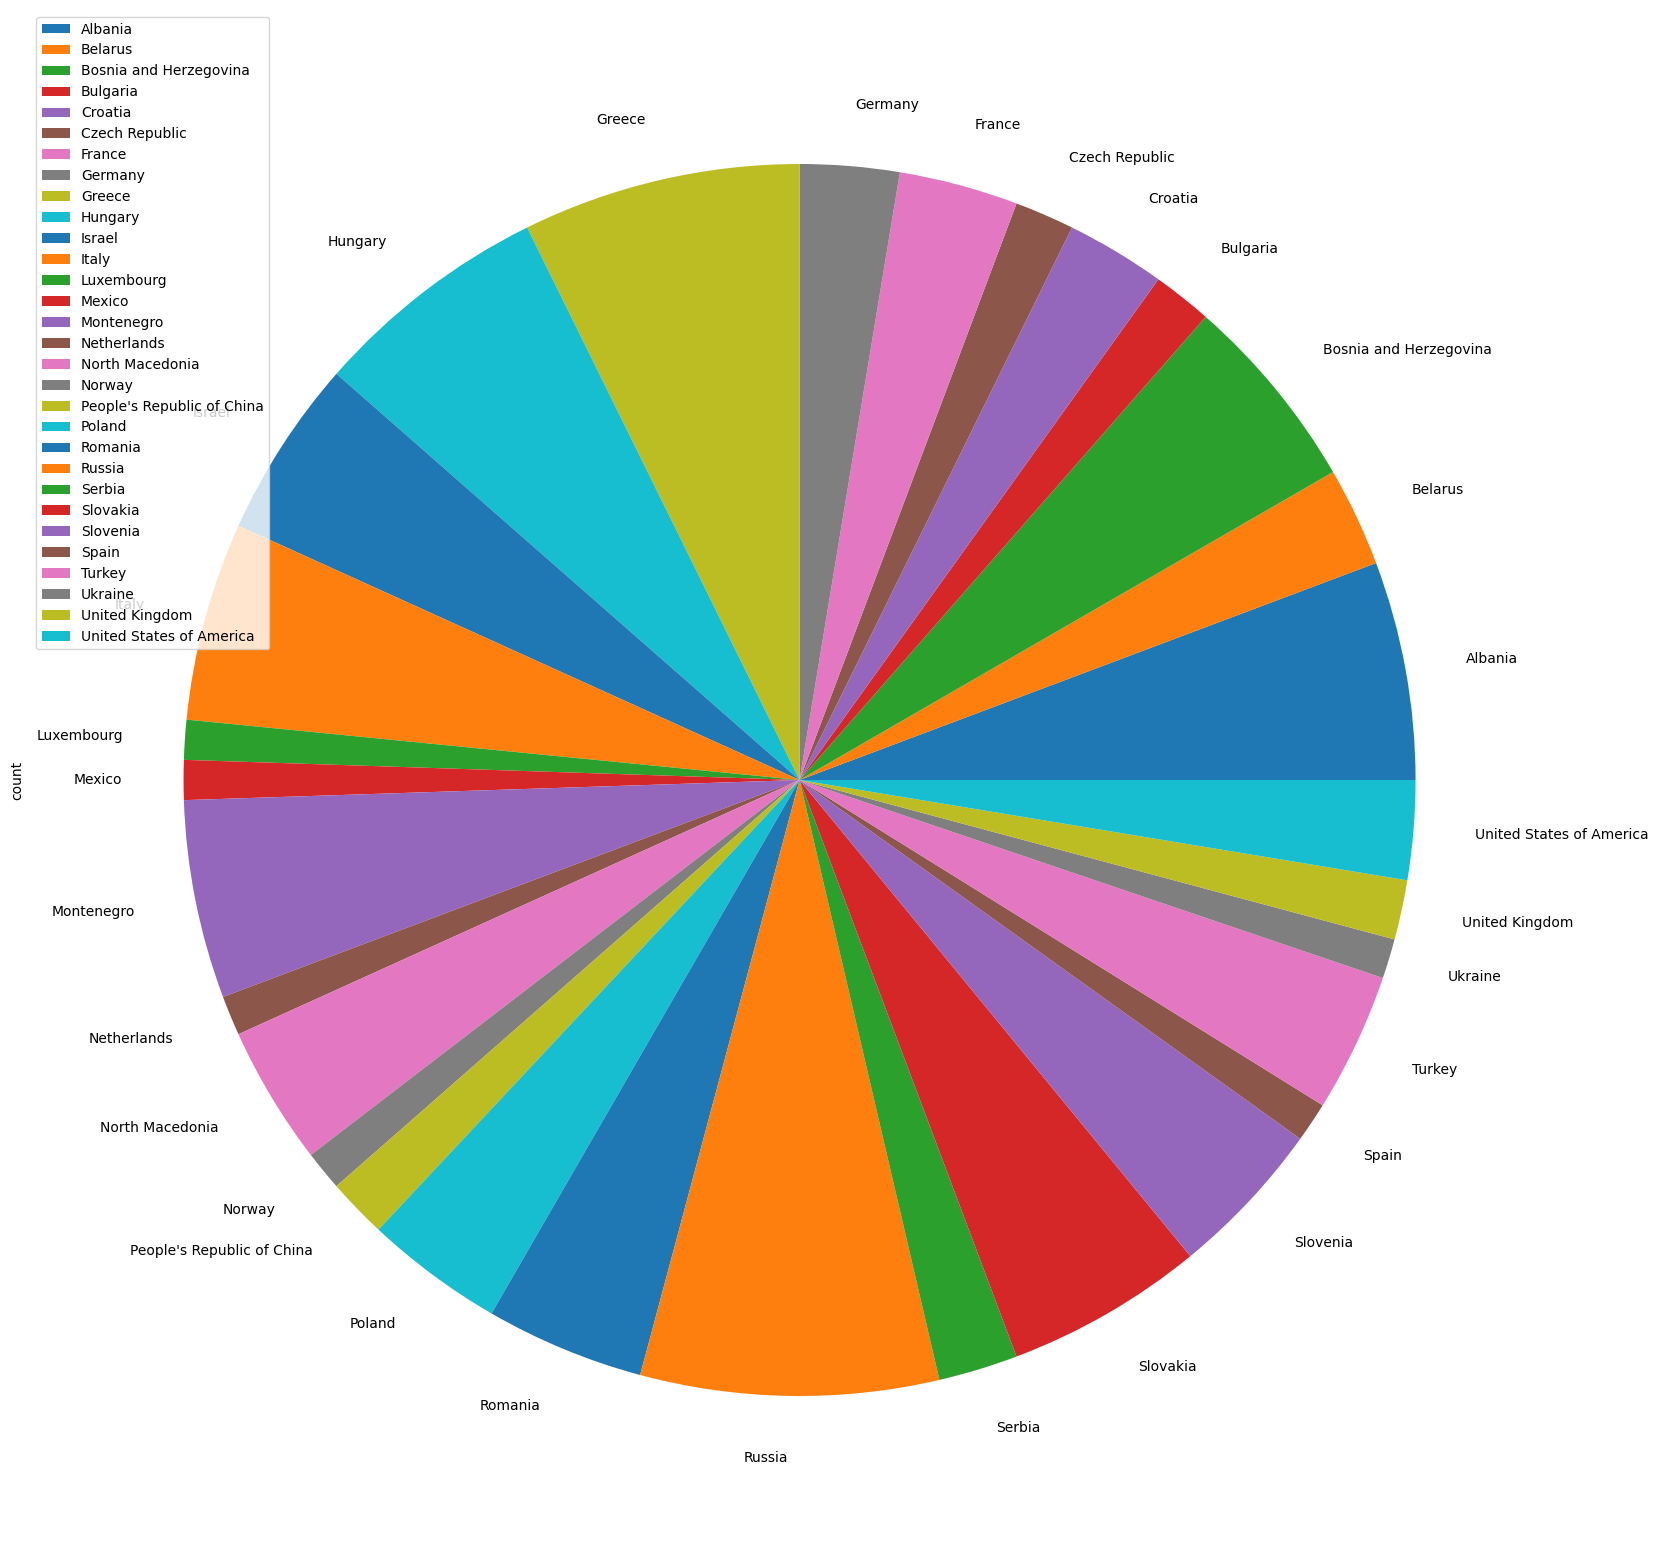

In [20]:
values = srbija.groupBy(["src","dst"]).count().where("count > '1'")
values = values.join(dataDrzave, maxConn["dst"]==dataDrzave["id"]).toPandas()
plt.rcParams["figure.figsize"] = (20,20)
values.groupby(['country']).sum().plot(kind='pie', y='count')

In [21]:
brBG.show()

+---+----+-----+
|src| dst|count|
+---+----+-----+
| 43| 227|    7|
| 30| 117|   11|
| 79| 214|    1|
| 79| 219|    2|
|822| 142|    2|
|155| 822|    1|
|217| 217|    8|
|878|1028|    1|
| 55|  41|    3|
| 41|  31|    2|
|142|1000|    1|
|865| 717|    2|
|774|  96|   13|
| 16| 252|    1|
| 33| 212|    4|
|869| 819|    1|
| 17| 668|    4|
|408|  38|    8|
|733|  38|    2|
| 31| 218|    1|
+---+----+-----+
only showing top 20 rows



In [22]:
brBG.select(F.mean("count")).show()

+------------------+
|        avg(count)|
+------------------+
|4.5048076923076925|
+------------------+



In [23]:
gDDC = GraphFrame(dataDrzave, brBG)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:169: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [24]:
#Prvih 18 zemalja poredjane po broju gradova sa bratskim gradovima
sortDrz = gDD.outDegrees.join(dataDrzave, gDD.outDegrees["id"]==dataDrzave["id"])
sortDrz.sort(sortDrz.outDegree.desc()).limit(18).show(truncate=False)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+---------+---+--------------------------+
|id |outDegree|id |country                   |
+---+---------+---+--------------------------+
|36 |1240     |36 |Poland                    |
|183|1126     |183|Germany                   |
|38 |1060     |38 |Italy                     |
|30 |952      |30 |United States of America  |
|142|752      |142|France                    |
|148|597      |148|People's Republic of China|
|33 |582      |33 |Finland                   |
|96 |540      |96 |Mexico                    |
|29 |524      |29 |Spain                     |
|145|484      |145|United Kingdom            |
|43 |464      |43 |Turkey                    |
|801|463      |801|Israel                    |
|159|441      |159|Russia                    |
|37 |356      |37 |Lithuania                 |
|212|311      |212|Ukraine                   |
|28 |287      |28 |Hungary                   |
|41 |283      |41 |Greece                    |
|218|277      |218|Romania                   |
+---+--------

In [75]:
gDD.vertices.count()

192

<Axes: xlabel='country', ylabel='count'>

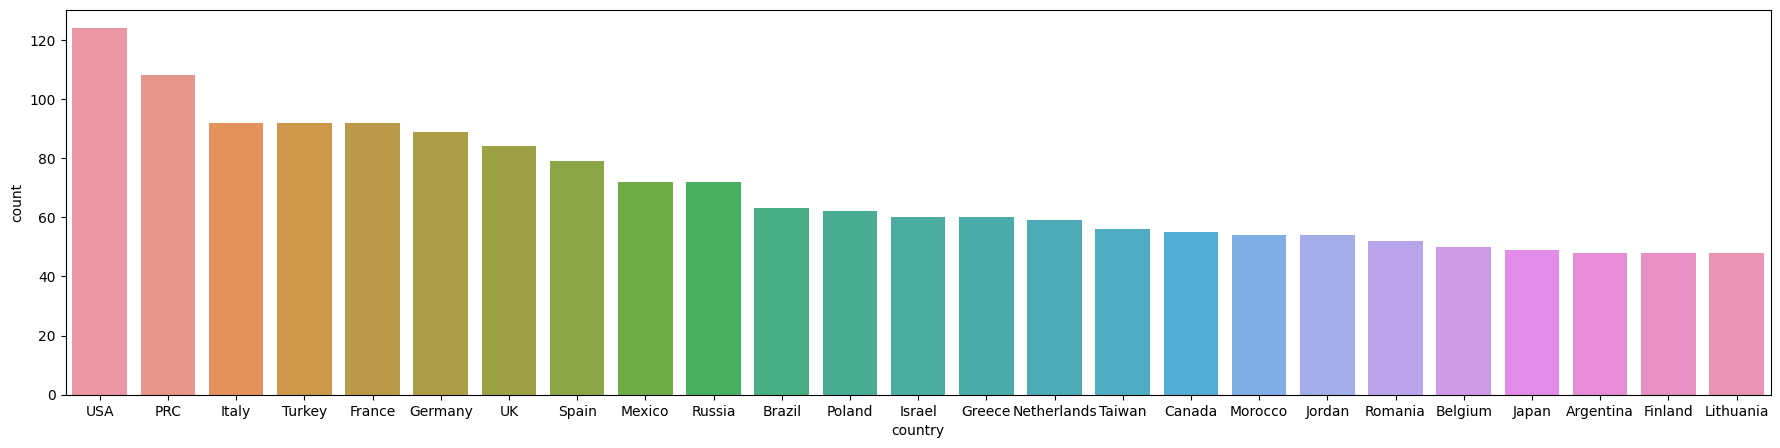

In [56]:
#Prvih 25 zemalja poredjane po broju jedinstvenih konekcija sa drugim zemljama
from pyspark.sql.functions import regexp_replace
zemljeBrV = gDD.edges.distinct().groupBy(["src"]).count()
zemljeBrV = zemljeBrV.join(dataDrzave, zemljeBrV["src"]==dataDrzave["id"]).sort(F.col("count").desc())
zemljeBrV = zemljeBrV.withColumn('country', regexp_replace('country', 'United States of America', 'USA')).withColumn('country', regexp_replace('country', "People's Republic of China", 'PRC')).withColumn('country', regexp_replace('country', "United Kingdom", 'UK'))
zemljeBrV = zemljeBrV.limit(25).toPandas()
plt.rcParams["figure.figsize"] = (22,5)
sn.barplot(y="count", x="country", data=zemljeBrV)

In [66]:
#Graf gde zemlje predstavljaju cvorove a grane postoje ako imaju vise od 10 bratskih gradova medju sobom
temp = brBG.where("count > '10'").select('src' , 'dst').distinct()
gDDD = GraphFrame(dataDrzave, temp)
#Drzave koje imaju zajednicke veze
komp = gDDD.stronglyConnectedComponents(maxIter=10)

In [67]:
komp.groupBy(["component"]).count().where("count > '1'").show()

+-------------+-----+
|    component|count|
+-------------+-----+
|1194000908288|    3|
|  60129542145|   68|
+-------------+-----+



In [68]:
komp.where("component == '1194000908288'").show()

+----+----------+-------------+
|  id|   country|    component|
+----+----------+-------------+
|1029|Mozambique|1194000908288|
|1011|Cape Verde|1194000908288|
|  45|  Portugal|1194000908288|
+----+----------+-------------+



In [85]:
komp.where("component == '60129542145'").show(68, truncate = False)

+------+--------------------------+-----------+
|id    |country                   |component  |
+------+--------------------------+-----------+
|183   |Germany                   |60129542145|
|717   |Venezuela                 |60129542145|
|16    |Canada                    |60129542145|
|215   |Slovenia                  |60129542145|
|189   |Iceland                   |60129542145|
|241   |Cuba                      |60129542145|
|145   |United Kingdom            |60129542145|
|774   |Guatemala                 |60129542145|
|30    |United States of America  |60129542145|
|36    |Poland                    |60129542145|
|869   |Thailand                  |60129542145|
|221   |North Macedonia           |60129542145|
|31    |Belgium                   |60129542145|
|403   |Serbia                    |60129542145|
|668   |India                     |60129542145|
|1041  |Senegal                   |60129542145|
|184   |Belarus                   |60129542145|
|810   |Jordan                    |60129

In [128]:
#Graf gde zemlje predstavljaju cvorove a grane postoje ako imaju vise od 20 bratskih gradova medju sobom
temp = brBG.where("count > '80'").select('src' , 'dst').distinct()
gDDD2 = GraphFrame(dataDrzave, temp)
#Drzave koje imaju zajednicke veze
komp2 = gDDD2.stronglyConnectedComponents(maxIter=10)

In [129]:
komp2.groupBy(["component"]).count().where("count > '1'").show()

+------------+-----+
|   component|count|
+------------+-----+
|163208757248|    2|
|292057776128|    3|
|171798691840|    2|
+------------+-----+



In [133]:
komp2.where("component == '163208757248'").show(truncate = False)

+---+------------------------+------------+
|id |country                 |component   |
+---+------------------------+------------+
|30 |United States of America|163208757248|
|96 |Mexico                  |163208757248|
+---+------------------------+------------+



In [134]:
komp2.where("component == '171798691840'").show(truncate = False)

+---+-------+------------+
|id |country|component   |
+---+-------+------------+
|34 |Sweden |171798691840|
|33 |Finland|171798691840|
+---+-------+------------+



In [132]:
komp2.where("component == '292057776128'").show(truncate = False)

+---+-------+------------+
|id |country|component   |
+---+-------+------------+
|183|Germany|292057776128|
|36 |Poland |292057776128|
|212|Ukraine|292057776128|
+---+-------+------------+



In [142]:
#Graf gde zemlje predstavljaju cvorove a grane postoje ako imaju vise od 20 bratskih gradova medju sobom
temp = brBG.where("count > '110'").select('src' , 'dst').distinct()
gDDD3 = GraphFrame(dataDrzave, temp)
#Drzave koje imaju zajednicke veze
komp3 = gDDD3.stronglyConnectedComponents(maxIter=10)
komp3.groupBy(["component"]).count().where("count > '1'").show()

+------------+-----+
|   component|count|
+------------+-----+
|163208757248|    2|
|292057776128|    3|
+------------+-----+



In [143]:
komp3.where("component == '292057776128'").show(truncate = False)

+---+-------+------------+
|id |country|component   |
+---+-------+------------+
|183|Germany|292057776128|
|36 |Poland |292057776128|
|212|Ukraine|292057776128|
+---+-------+------------+



In [144]:
komp3.where("component == '163208757248'").show(truncate = False)

+---+------------------------+------------+
|id |country                 |component   |
+---+------------------------+------------+
|30 |United States of America|163208757248|
|96 |Mexico                  |163208757248|
+---+------------------------+------------+



In [170]:
temp = brBG.select('src' , 'dst')
gDDD4 = GraphFrame(dataDrzave, temp)
result = gDDD.labelPropagation(maxIter=5)
result.show()

+-----+--------------------+-------------+
|   id|             country|        label|
+-----+--------------------+-------------+
|  183|             Germany|1056561954819|
|  717|           Venezuela| 395136991233|
|   77|             Uruguay| 627065225217|
|  817|              Kuwait|1649267441664|
| 1049|               Sudan|1460288880640|
|   16|              Canada| 163208757248|
|  215|            Slovenia| 292057776128|
| 1008|         Ivory Coast|  60129542144|
|  750|             Bolivia|1297080123393|
|  228|             Andorra| 627065225216|
|  948|             Tunisia| 601295421440|
|23681|     Northern Cyprus|1297080123392|
|  189|             Iceland| 292057776128|
|  241|                Cuba| 292057776128|
|  145|      United Kingdom| 292057776128|
|  114|               Kenya|1056561954817|
|  398|             Bahrain| 970662608896|
|  774|           Guatemala| 395136991233|
|  971|Republic of the C...| 884763262978|
|  851|        Saudi Arabia|  68719476737|
+-----+----

In [173]:
result.groupBy(["label"]).count().where("count > '1'").show()

+-------------+-----+
|        label|count|
+-------------+-----+
|1640677507072|    3|
| 163208757248|   12|
|1683627180032|    2|
| 395136991233|    2|
| 292057776128|   32|
|1056561954819|   18|
+-------------+-----+



In [159]:
result.where("label == '1640677507072'").show(truncate = False)

+---+------------------------+-------------+
|id |country                 |label        |
+---+------------------------+-------------+
|30 |United States of America|1640677507072|
|928|Philippines             |1640677507072|
|17 |Japan                   |1640677507072|
+---+------------------------+-------------+



In [160]:
result.where("label == '163208757248'").show(truncate = False)

+---+-------------------+------------+
|id |country            |label       |
+---+-------------------+------------+
|16 |Canada             |163208757248|
|869|Thailand           |163208757248|
|668|India              |163208757248|
|96 |Mexico             |163208757248|
|419|Peru               |163208757248|
|739|Colombia           |163208757248|
|865|Taiwan             |163208757248|
|664|New Zealand        |163208757248|
|408|Australia          |163208757248|
|117|Ghana              |163208757248|
|27 |Republic of Ireland|163208757248|
|884|South Korea        |163208757248|
+---+-------------------+------------+



In [161]:
result.where("label == '1683627180032'").show(truncate = False)

+----+----------+-------------+
|id  |country   |label        |
+----+----------+-------------+
|1029|Mozambique|1683627180032|
|1011|Cape Verde|1683627180032|
+----+----------+-------------+



In [162]:
result.where("label == '395136991233'").show(truncate = False)

+---+---------+------------+
|id |country  |label       |
+---+---------+------------+
|717|Venezuela|395136991233|
|774|Guatemala|395136991233|
+---+---------+------------+



In [163]:
result.where("label == '292057776128'").show(32, truncate = False)

+------+----------------------+------------+
|id    |country               |label       |
+------+----------------------+------------+
|215   |Slovenia              |292057776128|
|189   |Iceland               |292057776128|
|241   |Cuba                  |292057776128|
|145   |United Kingdom        |292057776128|
|31    |Belgium               |292057776128|
|403   |Serbia                |292057776128|
|1041  |Senegal               |292057776128|
|810   |Jordan                |292057776128|
|38    |Italy                 |292057776128|
|29    |Spain                 |292057776128|
|213   |Czech Republic        |292057776128|
|55    |Netherlands           |292057776128|
|1028  |Morocco               |292057776128|
|965   |Burkina Faso          |292057776128|
|41    |Greece                |292057776128|
|262   |Algeria               |292057776128|
|298   |Chile                 |292057776128|
|219060|State of Palestine    |292057776128|
|811   |Nicaragua             |292057776128|
|40    |Au

In [164]:
result.where("label == '1056561954819'").show(truncate = False)

+---+--------------------------+-------------+
|id |country                   |label        |
+---+--------------------------+-------------+
|183|Germany                   |1056561954819|
|36 |Poland                    |1056561954819|
|221|North Macedonia           |1056561954819|
|184|Belarus                   |1056561954819|
|34 |Sweden                    |1056561954819|
|20 |Norway                    |1056561954819|
|148|People's Republic of China|1056561954819|
|222|Albania                   |1056561954819|
|28 |Hungary                   |1056561954819|
|232|Kazakhstan                |1056561954819|
|223|Greenland                 |1056561954819|
|229|Cyprus                    |1056561954819|
|191|Estonia                   |1056561954819|
|159|Russia                    |1056561954819|
|219|Bulgaria                  |1056561954819|
|211|Latvia                    |1056561954819|
|212|Ukraine                   |1056561954819|
|218|Romania                   |1056561954819|
+---+--------